# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [313]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [3]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
insurance_df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

# Note: There are no missing values in the dataset

<Axes: >

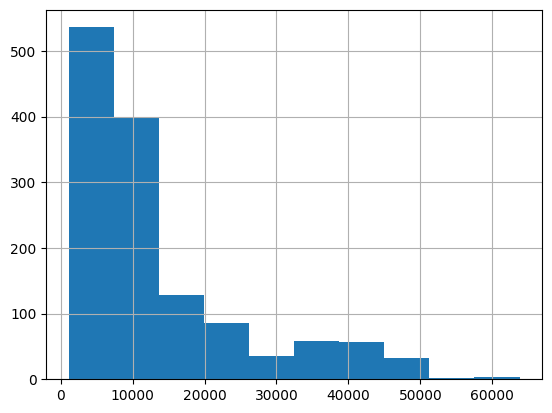

In [7]:
insurance_df['charges'].hist()

<Axes: xlabel='children'>

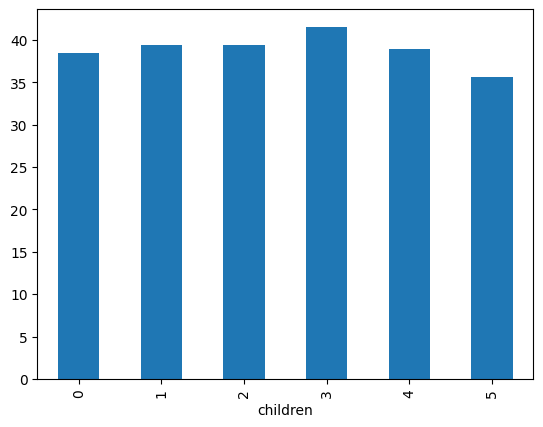

In [55]:
insurance_df.groupby('children')['age'].mean().plot(kind = 'bar')

<Axes: xlabel='children'>

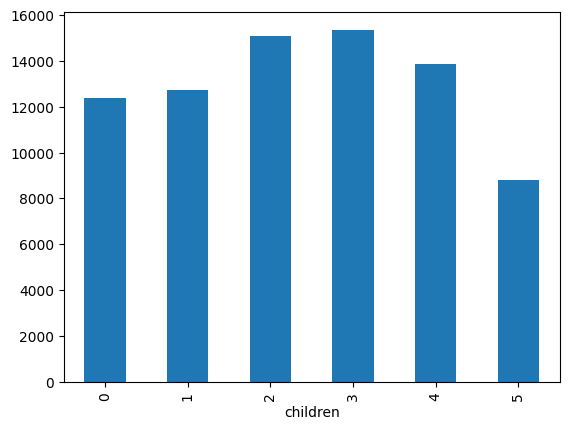

In [314]:
insurance_df.groupby('children')['charges'].mean().plot(kind = 'bar')

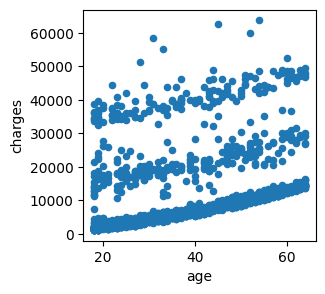

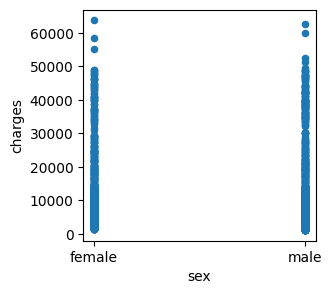

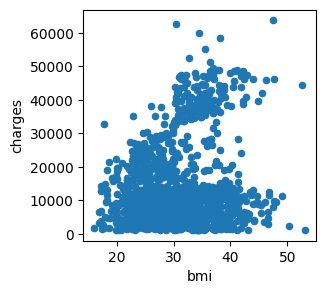

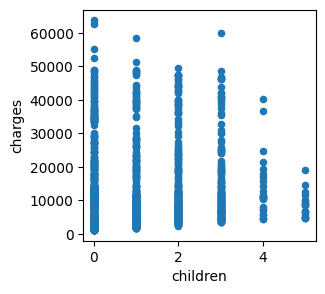

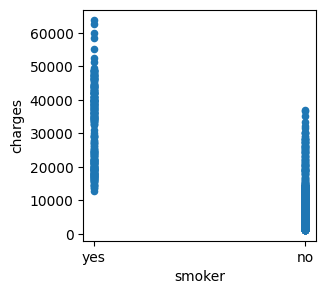

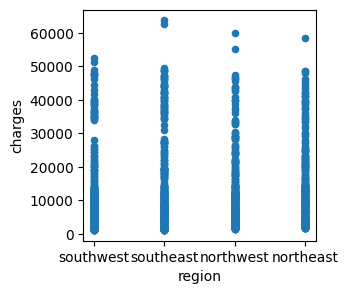

In [8]:
for column in insurance_df.columns[:-1]: #[:-1] ignores the index column for my random sample
    insurance_df.plot(kind="scatter", x=column, y='charges', subplots=True, figsize = (3,3))

In [10]:
corr_matrix = insurance_df.corr(numeric_only=True)
corr_matrix["charges"].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

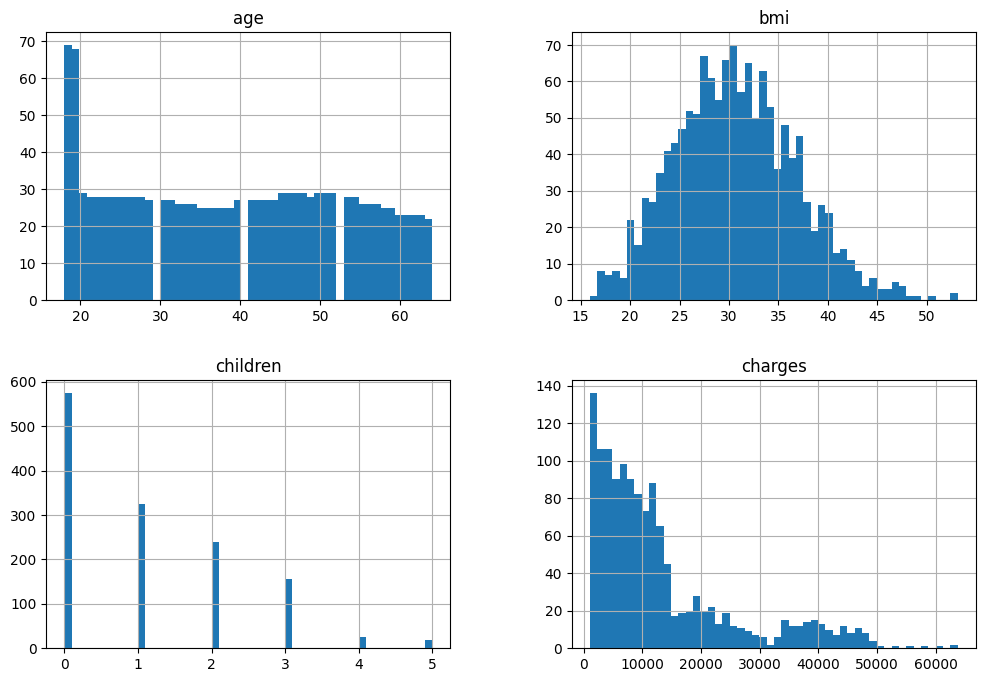

In [11]:
insurance_df.hist(bins=50, figsize=(12, 8))

<Axes: >

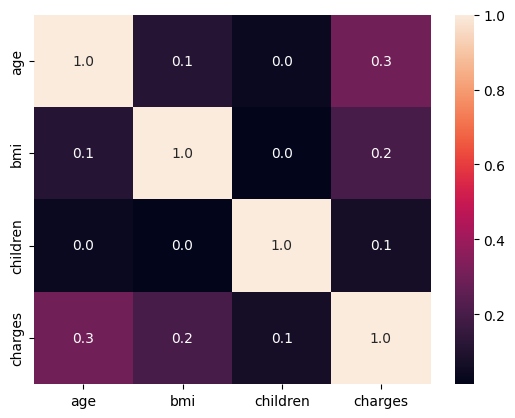

In [12]:
corr_matrix = insurance_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".1f")

In [13]:
insurance_df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [183]:
# TODO: Minimum price of the data
minimum_price = insurance_df['charges'].min()

# TODO: Maximum price of the data
maximum_price = insurance_df['charges'].max()

# TODO: Mean price of the data
mean_price = insurance_df['charges'].mean()

# TODO: Median price of the data
median_price = insurance_df['charges'].median()

# TODO: Standard deviation of prices of the data
std_price = insurance_df['charges'].std()

# Show the calculated statistics
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $1,121.87
Maximum price: $63,770.43
Mean price: $13,270.42
Median price $9,382.03
Standard deviation of prices: $12,110.01


<Axes: >

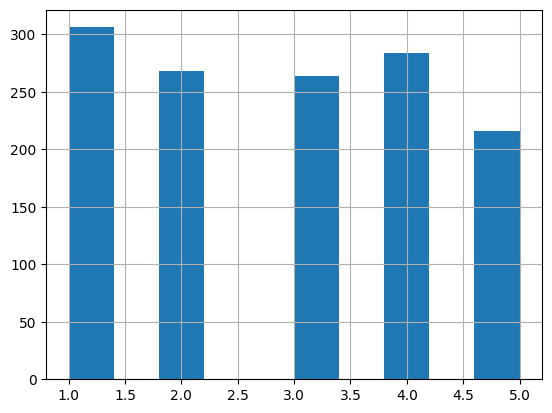

In [39]:
insurance_df["age_cat"] = pd.cut(insurance_df["age"], bins=[15, 25, 35, 45, 55, np.inf], labels=[1, 2, 3, 4, 5])
insurance_df["age_cat"].hist()

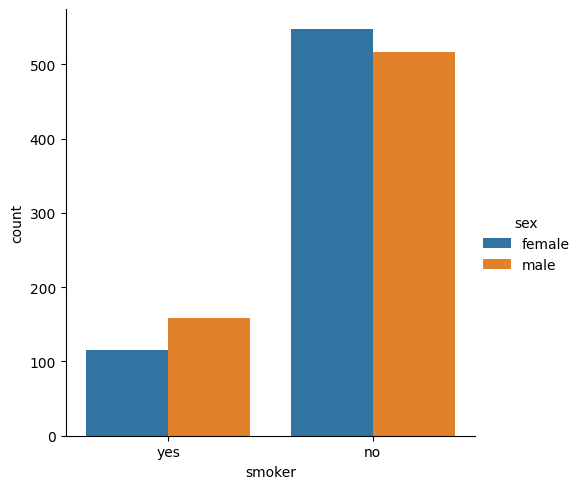

In [317]:
sns.catplot(x ="smoker", hue ="sex", kind ="count", data = insurance_df)

<Axes: xlabel='smoker'>

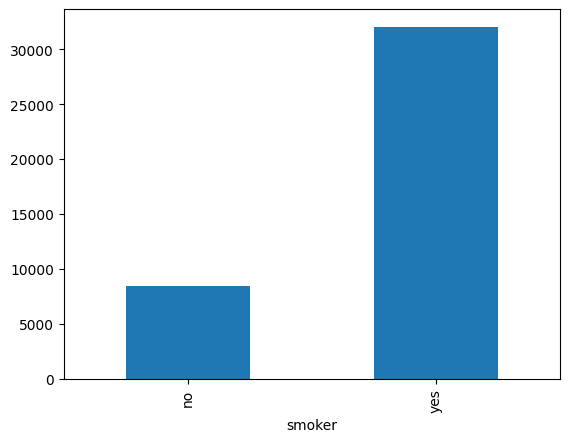

In [38]:
insurance_df.groupby('smoker')['charges'].mean().plot(kind = 'bar')

<Axes: xlabel='region'>

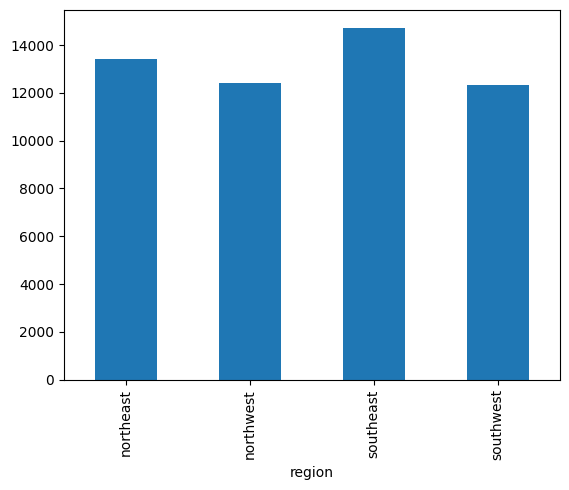

In [37]:
insurance_df.groupby('region')['charges'].mean().plot(kind = 'bar')

<Axes: xlabel='sex'>

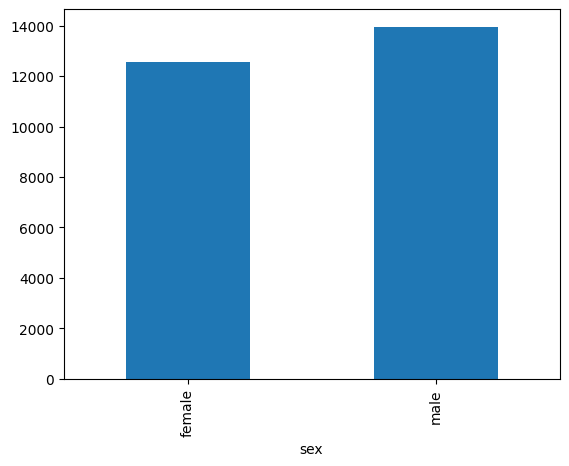

In [26]:
insurance_df.groupby('sex')['charges'].mean().plot(kind = 'bar')
# sns.histplot(x = 'sex', hue = 'charges', data=insurance_df)

<Axes: xlabel='age', ylabel='Count'>

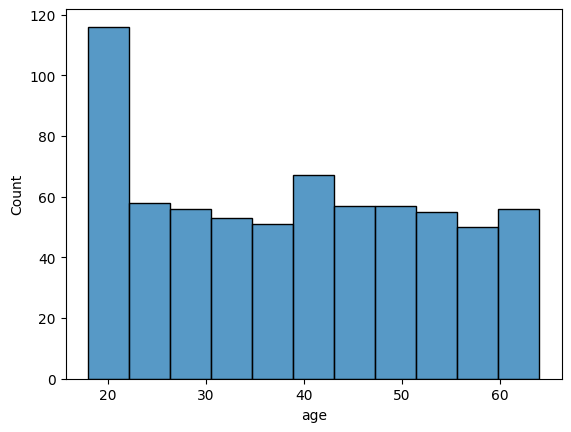

In [30]:
sns.histplot(x = insurance_df.loc[insurance_df['sex']=='male','age'])

<Axes: xlabel='age', ylabel='Count'>

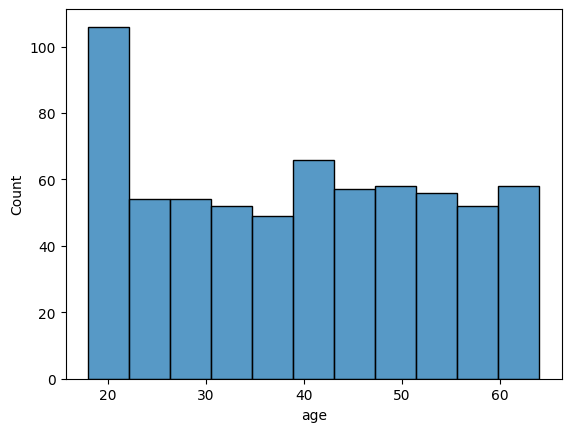

In [31]:
sns.histplot(x = insurance_df.loc[insurance_df['sex']=='female','age'])

# Feature Selection

In [363]:
features = insurance_df.drop('charges', axis = 1)
target = insurance_df["charges"]

# Split test and train sets

In [364]:
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=10)

# Handling Categorical Attributes

In [365]:
from sklearn.preprocessing import OneHotEncoder
#cat_encoder = OneHotEncoder()

In [241]:
# Example
# oh= OneHotEncoder(sparse_output=False).set_output(transform="pandas")
# one_hot_encoded=oh.fit_transform(features_train[["sex"]])
# features_train = pd.concat([features_train,one_hot_encoded],axis=1).drop(columns=["sex"])

In [366]:
def convert_cat(data, feature):
 cat_encoder= OneHotEncoder(sparse_output=False).set_output(transform="pandas")
 one_hot_encoded=cat_encoder.fit_transform(data[[feature]])
 data = pd.concat([data,one_hot_encoded],axis=1).drop(columns=[feature])
 return data

## Train Features

In [367]:
columnsToEncode = list(features_train.select_dtypes(include=['category','object']))
for feature in columnsToEncode:
 features_train = convert_cat(features_train, feature) 
features_train.head(2)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
859,57,28.10,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1327,51,30.03,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


## Test Features

In [368]:
columnsToEncode = list(features_test.select_dtypes(include=['category','object']))
for feature in columnsToEncode:
 features_test = convert_cat(features_test, feature) 
features_test.head(2)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
7,37,27.740,3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
999,36,26.885,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [168]:
# get_dummies method
#features_train = pd.get_dummies(features_train,prefix=['sex'], columns = ['sex'], drop_first=True)

# Feature Scaling

In [326]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

## Train Set

In [327]:
features_train_num = features_train.loc[:, ['age', 'bmi']]
features_train = features_train.drop(['age', 'bmi'], axis = 1)

features_train_num_scaled = std_scaler.fit_transform(features_train_num)

features_train_num_scaled = pd.DataFrame(features_train_num_scaled, columns = features_train_num.columns, index = features_train.index)
features_train = pd.concat([features_train,features_train_num_scaled],axis=1)

## Test Set

In [328]:
features_test_num = features_test.loc[:, ['age', 'bmi']]
features_test = features_test.drop(['age', 'bmi'], axis = 1)

features_test_num_scaled = std_scaler.fit_transform(features_test_num)

features_test_num_scaled = pd.DataFrame(features_test_num_scaled, columns = features_test_num.columns, index = features_test.index)
features_test = pd.concat([features_test,features_test_num_scaled],axis=1)

# Training

In [369]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(features_train, target_train)

LinearRegression()

In [370]:
linear_model.coef_

array([   260.56133142,    352.29691581,    560.97929154,    129.34911457,
         -129.34911457, -12150.74526982,  12150.74526982,    334.317409  ,
          415.96281324,   -536.11393166,   -214.16629058])

In [371]:
linear_model.intercept_

-1102.6551824140206

# Evaluation

In [372]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [389]:
initial_prediction = linear_model.predict(features_train)

In [390]:
r2_score(target_train, initial_prediction)

0.7604186157288806

In [391]:
mean_squared_error(target_train, initial_prediction, squared=False)

6005.95916562439

In [392]:
mean_absolute_error(target_train, initial_prediction)

4150.0616088025035

In [393]:
mean_absolute_percentage_error(target_train, initial_prediction)

0.4151783980307637

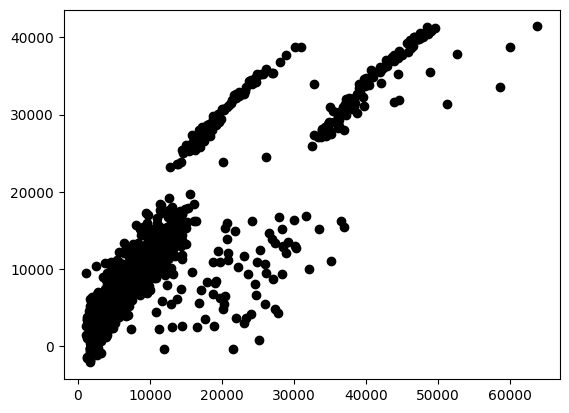

In [394]:
plt.scatter(target_train, initial_prediction, color='black')
plt.show()

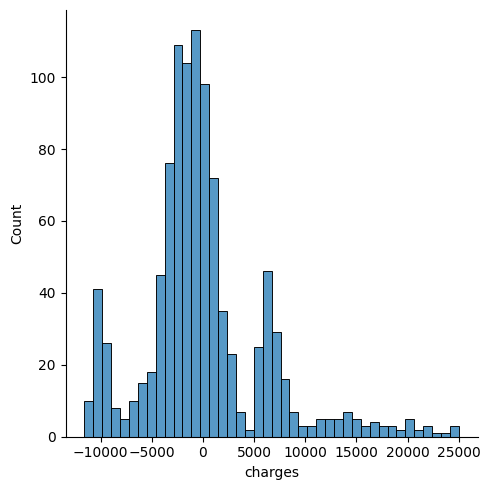

In [395]:
sns.displot(target_train - initial_prediction)

# Test the linear model

In [375]:
predicted_charges = linear_model.predict(features_test)

In [376]:
r2_score(target_test, predicted_charges)

0.7162745306503483

In [377]:
mean_squared_error(target_test, predicted_charges, squared=False)

6176.642075658259

In [378]:
mean_absolute_error(target_test, predicted_charges)

4303.564911367609

In [379]:
mean_absolute_error(target_test, predicted_charges)

4303.564911367609